# Introduction

This notebook is dedicated to the data processing of the laboratory rhizotron experiment. 
Two types of data are collected, an ERT dataset and a MALM. A classical ERT inversion is done while no inversion is required for the MALM as the potential value are analysed using a simple descriptive approach wich consist in plotting the gradient of the potential field * the conductivity of the medium.
This operation led to the identification of the direction and intensity of the current flux without having to invert the MALM data.

# Processing

## Steps to repoduce
1. invert ERT data
2. import TDIP data
3. filter TDIP data
4. fit CC model
4. plot streamlines, potential maps and CC maps

### Import all the necessary packages
pybert is a dependency

In [1]:
import os
import matplotlib.pyplot as plt

#!conda install -f pybert
#!conda install -c gimli pybert
import pybert as pb
from pybert import tdip
import pygimli as pg


#import pygimli
import numpy as np

# My own library
from rhizo.utils_rhizo import fct_utils as FU
from rhizo.run_ERT_invert_plant import invert_Resipy_ERT, invert_pygimli_ERT

Define survey date (change date accordingly) and load datasets

In [2]:
date = '0209' #  '1712' 0112 '1310' '1611' # (ddmm)

In [3]:
main = os.getcwd()
os.chdir(main)
geomPath, meshPath, icsdPath, figpath, processedPath = FU.definePath(main,date)
print(figpath)

./fig/0209/


Load ERT and MALM files 

(nothing to change providing all the raw file data respect the naming convention ERT_mmdd.bin (mm=month, dd=day))

In [4]:
# filename located in the raw data folder
# MALMIP_0122 MALMIP_0113 'MALMIP1217' 'MALMIP1201.bin' 'MALMIP1013' 'MALMIP1116.bin'
inputfileMALM = 'MALMIP_' + date + '.bin' #  
inputfileERT = 'ERT_' + date + '.bin' #

### Define survey parameters
if invERT is set to FALSE, then waterRes needs to be defined according to the conductivity measured with the probe (in microS/cm)

(see excel file for correspondance dates/files/parameters)

In [ ]:
invERT = True
waterRes = (1/855)*1e4 #21.23 # water resistivity (Ohm.m) converted from microS/cm 767, 477 
rec = True # reciprocal analysis
A = 72-1 # Id electrode A
B = 65-1 # Id electrode B
injection_duration = 2 # time of injection (s)

Filter data (no change needed in normal config)

In [6]:
rmvInvalid = False # True if you want to write filtered files/ False for raw data
rmv_outliers = True
rmv_id= None #None # 61-1 o None
rmv_dup = True # remove duplicates
rmv_filter_fit = False # fit Cole-Cole parameter and filter

split_Nfix = [True, 71-1] # split the sequence between N fix and N variable
Nfix = 71-1 #71-1  #None 71-1 # Id electrode N , put None if N is varying

Plot TDIP data options (no change needed)

In [7]:
fitCC = True # show Cole-Cole fitted parameters (to compare with literature)
all_gates= True
if not all_gates: 
    gateIP = 3 
else: gateIP = None # id extracted time window in mV/V (?)

### Run ERT inversion

Load geometry and mesh (fwd and inv) - (no change needed)

In [8]:
if invERT:
    RemLineNb, Injection, coordE, pointsE= FU.load_geom(geomPath) # geometry file containing electrodes position including remotes 
    mesh3d_fwd, sensors = FU.mesh_import(meshPath + 'BaseRhizo_Vrte.msh')
    mesh3d_inv, sensors = FU.mesh_import(meshPath + 'BaseRhizo_Vrte_inv.msh')

Reading ./mesh/BaseRhizo_Vrte.msh... 

  Nodes: 8806
  Entries: 46678
    Points: 324
    Lines: 0
    Triangles: 13426
    Quads: 0
    Tetrahedra: 32928 

Creating mesh object... 

  Dimension: 3-D
  Boundary types: 1 (-1,)
  Regions: 1 (2,)
  Marked nodes: 324 (99, 991, 999, 1000)

Done. 

  Mesh: Nodes: 8806 Cells: 32928 Boundaries: 72569
-999
-1000
Reading ./mesh/BaseRhizo_Vrte_inv.msh... 

  Nodes: 3462
  Entries: 17622
    Points: 72
    Lines: 0
    Triangles: 5998
    Quads: 0
    Tetrahedra: 11552 

Creating mesh object... 

  Dimension: 3-D
  Boundary types: 1 (-1,)
  Regions: 1 (2,)
  Marked nodes: 72 (99,)

Done. 

  Mesh: Nodes: 3462 Cells: 11552 Boundaries: 26103


Run with resipy code

In [9]:
#!pip install resipy
#import resipy

#if invERT:
#        inputfileERTcsv = 'ERT_' + date + '.csv'
#    k = invert_Resipy_ERT(inputfileERTcsv)
#    k.showResults()
#    k.saveInvPlots(figpath + 'figs')

Run with pygimli code

24/02/21 - 15:25:37 - pyGIMLi - INFO - imported:  Data: Electrodes: 72 data: 4968
24/02/21 - 15:25:37 - pyGIMLi - INFO - Cache C:\Users\gcass\anaconda3\envs\pygimli\lib\site-packages\pygimli\physics\ert\ert.py:createGeometricFactors restored (0.0s x 19): C:\Users\gcass\AppData\Roaming\pygimli\Cache\10960051449893461007
24/02/21 - 15:25:39 - pyGIMLi - INFO - Found 1 regions.
24/02/21 - 15:25:39 - pyGIMLi - INFO - Creating forward mesh from region infos.
24/02/21 - 15:25:40 - pyGIMLi - INFO - Creating refined mesh (H2) to solve forward task.
24/02/21 - 15:25:44 - pyGIMLi - INFO - Starting inversion.
24/02/21 - 15:25:44 - pyGIMLi - INFO - Set default startmodel to median(data values)=126.82753380895355
24/02/21 - 15:25:44 - pyGIMLi - INFO - Created startmodel from forward operator: 11552 [126.82753380895355,...,126.82753380895355]


fop: <pygimli.physics.ert.ert.ERTModelling object at 0x000001C87A585470>
Data transformation: <pygimli.core._pygimli_.RTransLogLU object at 0x000001C87EC34CB0>
Model transformation: <pygimli.core._pygimli_.RTransLog object at 0x000001C87EC34B70>
min/max (data): 0.10/5030
min/max (error): 10.00%/10.96%
min/max (start model): 127/127
--------------------------------------------------------------------------------
--------------------------------------------------------------------------------
inv.iter 2 ... 

24/02/21 - 15:28:10 - pyGIMLi - INFO - Inversion stopped with chi² = 0.783


chi² = 0.78 (dPhi = 63.95%) lam: 20.0


################################################################################
#                  Abort criterion reached: chi² <= 1 (0.78)                   #
################################################################################


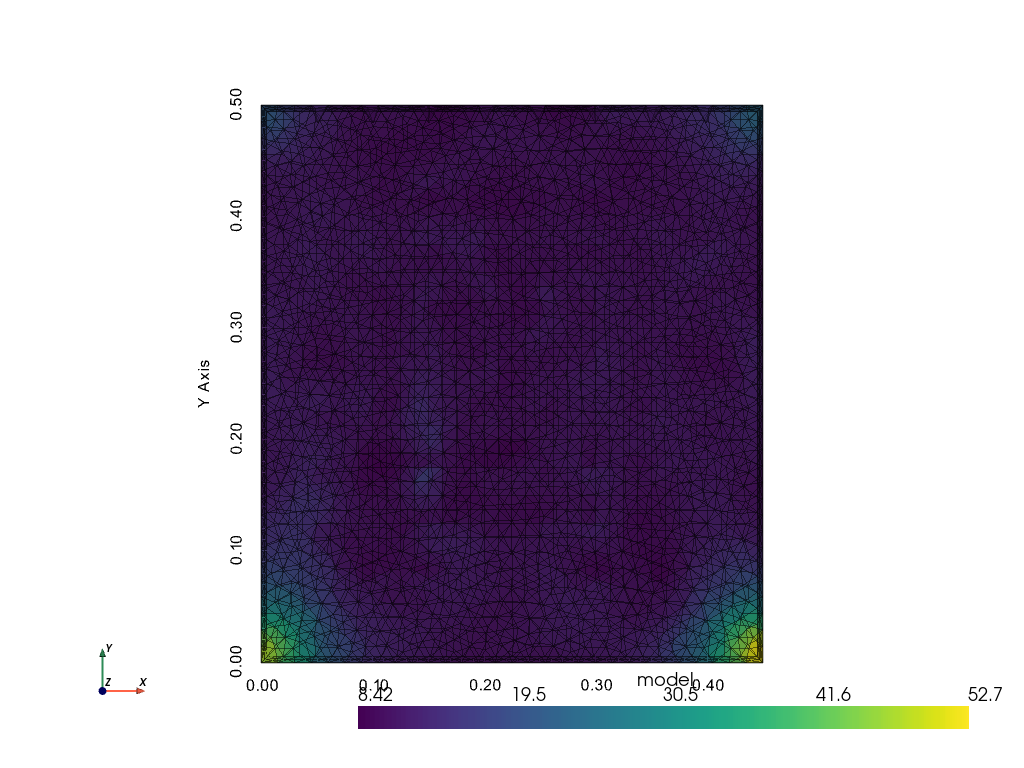

In [10]:
if invERT:
    model, ERTmanager = invert_pygimli_ERT(inputfileERT,sensors,mesh3d_inv,date)
    mesh3d_inv.addData('model',model)
    mesh3d_inv.exportVTK('model' + date + '.vtk')
    
    plotter, _ = pg.show(mesh3d_inv, data=model,
                         alpha=0.9, hold=True, notebook=True)
    plotter.view_xy()
    #plotter.clim([20, 60])
    plotter.show()
    plotter.screenshot('model' + date + '.png')

Plot measurement coverage (must be symetric)

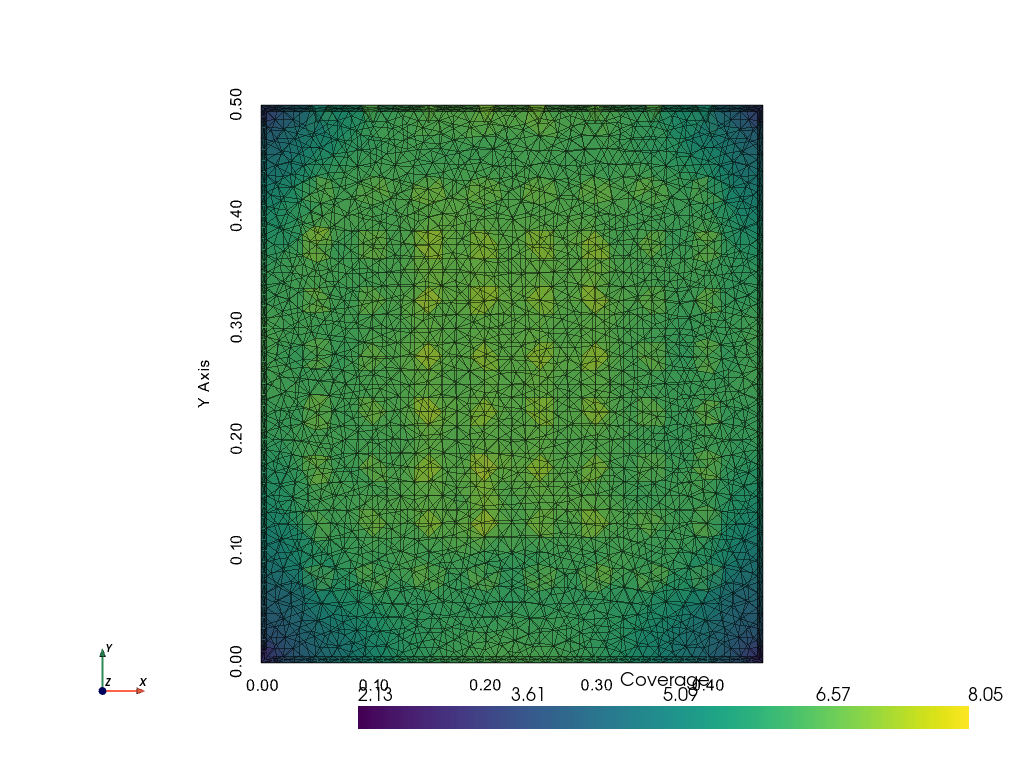

[(0.225, 0.25, 1.2858119910854642),
 (0.225, 0.25, -0.015),
 (0.0, 1.0, 0.0)]

In [11]:
    cov = ERTmanager.coverage()
    plotter, _ = pg.show(mesh3d_inv, data=cov,
                         alpha=0.9, hold=True, 
                         label="Coverage", 
                         notebook=True)
    plotter.view_xy()
    plotter.show()

Figures are saved in .vtk for publication quality reproducing. 
In order to check inversion consistency, compare the inverted resistivity with value of conductivity probe for the same day.

### MALM processing (no inversion just observation)

24/02/21 - 15:28:14 - pyGIMLi - INFO - imported:  Data: Electrodes: 72 data: 300


300 (20, 300)
nr= [  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17
  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35
  36  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53
  54  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71
  72  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89
  90  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107
 108 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125
 126 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143
 144 145 146 147 148 149 150 151 152 153 154 155 156 157 158 159 160 161
 162 163 164 165 166 167 168 169 170 171 172 173 174 175 176 177 178 179
 180 181 182 183 184 185 186 187 188 189 190 191 192 193 194 195 196 197
 198 199 200 201 202 203 204 205 206 207 208 209 210 211 212 213 214 215
 216 217 218 219 220 221 222 223 224 225 226 227 228 229 230 231 232 233
 234 235 236 237 238 239 240 241 

24/02/21 - 15:28:25 - pyGIMLi - INFO - imported:  Data: Electrodes: 72 data: 300


300 (20, 300)


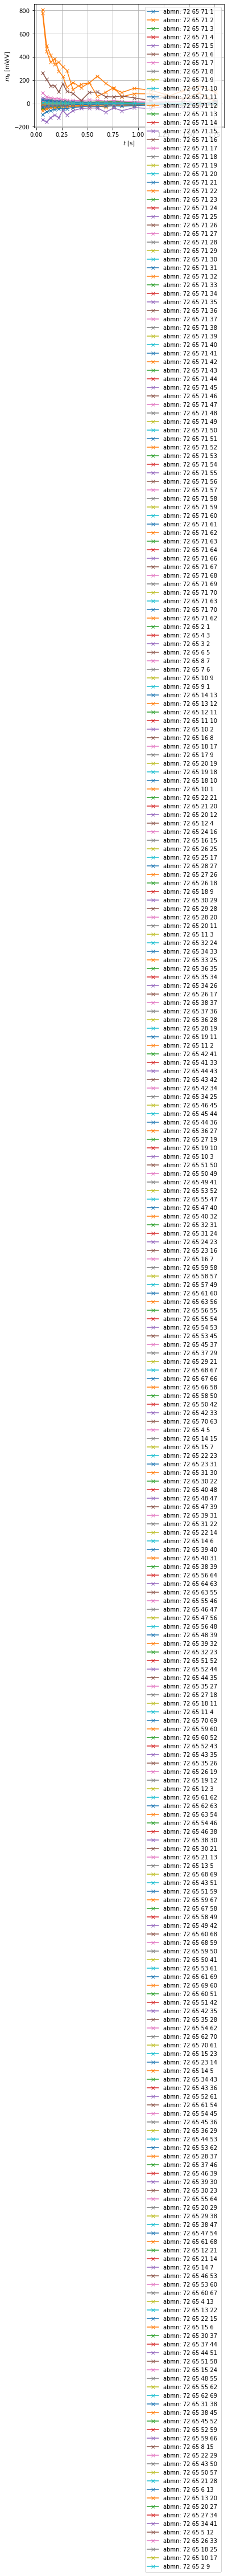

In [12]:
#%% Import data TDIP
IPcurves = tdip.TDIPdata('./raw_data/' + inputfileMALM) # e.g. ABEM or Syscal TXT export
valid = np.ones(len(IPcurves.data('m')))

fig, ax = plt.subplots()
ax = IPcurves.showDecay(nr=np.arange(0,len(IPcurves.data['a'])), showFit=False, 
                   yscale='linear',xscale='linear', ax=ax)
plt.savefig(figpath + 'rawdecay' + date + '.png')

IPcurves_f = tdip.TDIPdata('./raw_data/' + inputfileMALM)

Split sequences with Nfix

In [13]:
if split_Nfix[0]:

    IPcurves.data('m').array()
    idn = np.where(IPcurves.data('m')==split_Nfix[1])[0]
    idm = np.where(IPcurves.data('n')==split_Nfix[1])[0]
    print(idn)
    print(idm)
    idfix = list(idn) #+ list(idm) #list(idn)  #+ list(idm)
    
    IPcurves.data('a')[idfix].array()
    IPcurves.data('b')[idfix].array()
    id_elec_2rmv = idfix # remove Nfix electrodes
    
    if Nfix is not None:
        a = set(list(range(0, len(IPcurves.data('m')))))
        id_elec_2rmv = a.difference(set(idfix))
        id_elec_2rmv = list(id_elec_2rmv)
    
    IPcurves_f, valid_split = FU.filterTDIP(IPcurves,id_elec_2rmv)

[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47
 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71]
[]


Invalid duplicates 

In [14]:
if rmv_dup:
    a = IPcurves.data('a').array()
    abmn = np.zeros((len(a),4))
    abmn[:,0] = IPcurves.data('a').array()
    abmn[:,1] = IPcurves.data('b').array()
    abmn[:,2] = IPcurves.data('m').array()
    abmn[:,3] = IPcurves.data('n').array()
    unique, index_unique = np.unique(abmn, axis=0, return_index=True)
    test = set(list(range(0, len(IPcurves.data('a').array()))))
    id_elec_2rmv = test.difference(set(index_unique))
    id_elec_2rmv = list(id_elec_2rmv)
    IPcurves_f, valid_dup = FU.filterTDIP(IPcurves,id_elec_2rmv)

Invalid outliers 

In [15]:
if rmv_outliers: 
    id_outliers = np.where(abs(IPcurves.data['M1'])<10)[0]
    test = set(list(range(0, len(IPcurves.data('a').array()))))
    id_elec_2rmv = test.difference(set(id_outliers))
    id_elec_2rmv = list(id_elec_2rmv)
    IPcurves_f, valid_outliers = FU.filterTDIP(IPcurves,id_elec_2rmv)

Plot Cole Cole model parameters (boxplot distribution) 

In [16]:
if fitCC:
    valid_r, valid_m0, valid_tau, IPcurves_f, plt = plot_CC_violin(IPcurves_f, 
                                                             m0=[-9e99,9e99],
                                                             tau=[-9e99,9e99],
                                                             r=[-9e99,9e99])
    plt.savefig(figpath + 'violin_exp_fit_raw.png')
    

NameError: name 'plot_CC_violin' is not defined

Filter data (sum up all invalid/valid)

In [ ]:
j=0
for i, v in enumerate(valid):
    if split_Nfix[0]:
        if valid_split[j] == 0:
            valid[i] = 0
    if rmv_outliers:
        if valid_outliers[j] == 0:
            valid[i] = 0
    if rmv_dup:
        if valid_dup[j] == 0:
            valid[i] = 0
    if rmv_filter_fit:
        try:
             valid_r
        except NameError:
             valid_r = np.ones(len(IPcurves.data('m')))
        if valid_r[j] == 0:
            valid[i] = 0
        if valid_tau[j] == 0:
            valid[i] = 0           
        if valid_m0[j] == 0:
            valid[i] = 0
            
    j = j + 1 

# filter electrode position based on value of N
coordE_f = []
for i, mi in enumerate(IPcurves_f.data['m']):
    if mi==Nfix:
        mi=IPcurves_f.data['n'][i]
    id_coordE_f = np.where(mi+1==coordE[:,0])[0]
    coordE_f.append(coordE[id_coordE_f[0],:])
coordE_f = np.array(coordE_f)

Show decay and save data

In [ ]:
IPcurves_f.data.set('valid',valid)
IPcurves_f.MA = IPcurves_f.MA[:, IPcurves_f.data['valid'].array()==1]
IPcurves_f.data.removeInvalid()
IPcurves_f.data.save(processedPath + 'TDIP_filtered.data')

fig, ax = plt.subplots()
ax = IPcurves_f.showDecay(nr=np.arange(0,len(IPcurves_f.data['a'])), showFit=False, 
                   yscale='linear',xscale='linear', ax=ax)
plt.savefig(figpath + 'filtered_decay' + date + '.png')

Plot Cole Cole model parameters (again after filter)

In [ ]:
if fitCC:
    _,_,_,_,plt = plot_CC_violin(IPcurves_f)
    plt.savefig(figpath + 'violin_CC_fit_processed.png')
    np.count_nonzero(valid==0)

    m0_f, tau_f, c_f, fit_f = IPcurves_f.fitModelDecays(useColeCole=True)
    res_f = IPcurves.data('r')

Plot Cole Cole model parameters
- $\tau$ (relaxation time in [s]), to differentiate between long and short relaxation times (Peruzzo et al., 2021 subm.)
- $m_{0}$ (initial chargeability [mV/V])
- c (CC exponant [-])
- $\rho_{0}$ (low frequency impedance or DC resistivity)

In [ ]:
    fig, axs = plt.subplots(1, 4, sharex='all', sharey='all',figsize=(20,5))
    for i, cs in enumerate(['m0_f','tau_f','c_f', 'res_f']):
        sc=axs[i].scatter(coordE_f[:,1], coordE_f[:,2], c=eval(cs), 
                      cmap ='coolwarm',s=5e2) # norm=matplotlib.colors.Normalize()
        cbar = plt.colorbar(sc,ax=axs[i])
        #cbar.set_label('V')   
        axs[i].set_ylabel('y [m]',fontsize=15)
        axs[i].set_xlabel('x [m]',fontsize=15)
        axs[i].set_title(cs)
        axs[i].set_aspect('equal')

    plt.savefig(figpath + 'CC_fit.png')

Select Observation data (prep for ICSD analysis)

In [ ]:
Obs_raw = pb.importer.importSyscalPro('./raw_data/' + inputfileMALM) 
Obs, dataABMN=  FU.PrepareMALMData('./raw_data/' + inputfileMALM, Rec=False, DevErr=1,
                           MinV=1, MaxRc=1, Kfact=1, MinMaxAppRes=1, 
                           SwE=False, 
                           valid=valid,
                           date=date,
                           savefile=True)

Check that the model resistivity is defined (case where the ERT inversion is skipped)

In [ ]:
if not model:
    model = waterRes

Interpolate resistivity model and potential values to the same grid

Quiver plot= gradient(V)*conductivity
Results are saved in figs/date/ folder

In [ ]:
if Nfix is not None:
    mesh, uu, model = FU.streamlines(coordE_f, Obs('r').array(), model,
                   sensors=sensors, A=A, B=B, Nfix=Nfix,
                    vmin=-300, vmax=200, mesh_inv=mesh3d_inv)
    plt.savefig(figpath +'streamlines_PV.png')
    mesh.save(processedPath +'streamlines_mesh.bms')
    np.savetxt(processedPath +'uu' + date + '.txt', uu)
    np.savetxt(processedPath +'model' + date + '.txt', model)
        
    fig, ax = plt.subplots(nrows=1, ncols=4,figsize=(20,5))
    for i, g in enumerate(range(1,20,5)):
        mesh, stream = FU.streamlines(coordE_f, Obs('M'+str(g)).array(), model,
                       sensors=sensors, A=A, B=B, Nfix=Nfix, ax=ax[i],
                       vmin=-10, vmax=10, mesh_inv=mesh3d_inv)
        ax[i].set_title('Gate t:' + str(IPcurves.t[g-1]) + 's')
        plt.tight_layout()
        plt.savefig(figpath +'streamlines_transients.png')


    fig, ax = plt.subplots(nrows=1, ncols=4,figsize=(20,5))
    for i, g in enumerate(range(1,20,5)):
        FU.streamlines(coordE_f, Obs('M'+str(g)).array(), model,
                       sensors=sensors, A=A, B=B, Nfix=Nfix, ax=ax[i]
                       , mesh_inv=mesh3d_inv)
        ax[i].set_title('Gate t:' + str(IPcurves.t[g-1]) + 's')
        plt.tight_layout()
        plt.savefig(figpath + 'streamlines_transients2.png')